# 군집 (Clustering)

## K-평균 활용

### 이미지 분할

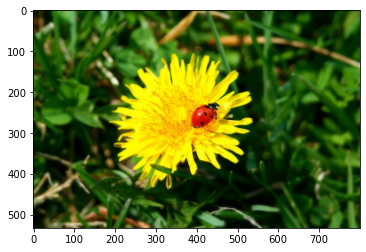

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

image = plt.imread('./images/ladybug.png')
plt.imshow(image)

In [33]:
image.shape # 넘파이는 세로축 먼저 (y=533, x=800, rgb=3)

(533, 800, 3)

In [34]:
X = image.reshape(-1, 3)
X.shape # 533*800 = 426400

(426400, 3)

In [35]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X) # 샘플은 426400개, R특성 G특성 B특성

KMeans(random_state=42)

In [36]:
kmeans.labels_

array([1, 1, 1, ..., 4, 1, 1])

In [37]:
import numpy as np
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [14]:
kmeans.cluster_centers_ # R,G,B 각각 그룹을 대표하는 조합 8개

array([[0.98351526, 0.9358979 , 0.02575099],
       [0.02285829, 0.11067164, 0.00578479],
       [0.21913776, 0.3867503 , 0.05799938],
       [0.7577562 , 0.21225451, 0.0445884 ],
       [0.09990539, 0.2542202 , 0.01693691],
       [0.612661  , 0.63010174, 0.38750824],
       [0.3721028 , 0.5235778 , 0.15729745],
       [0.8845895 , 0.72559094, 0.03441923]], dtype=float32)

In [32]:
# 각 그룹의 대표되는 rgb값으로 426400개의 픽셀을 대체 (원본x)
segmented_img = kmeans.cluster_centers_[kmeans.labels_] # 426000개의 index가 사용됨

In [31]:
segmented_img.shape

(533, 800, 3)

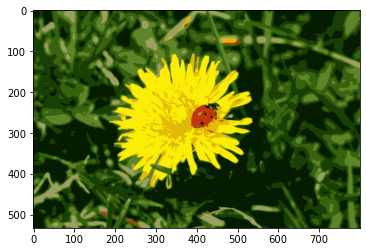

In [38]:
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img)

In [40]:
segmented_imgs = []
n_colors= [10, 8, 6, 4, 2]
for clusters in n_colors:
    kmeans = KMeans(n_clusters=clusters, random_state=42)
    kmeans.fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(image.shape)
    segmented_imgs.append(segmented_img)

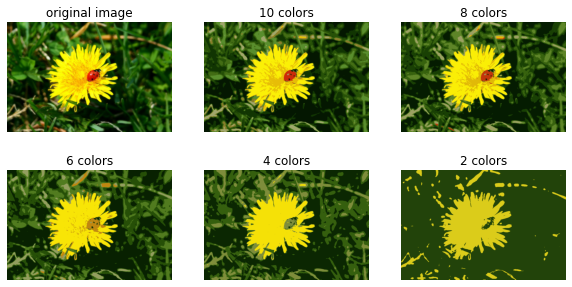

In [41]:
plt.figure(figsize=(10, 5))

plt.subplot(231)
plt.imshow(image)
plt.title('original image')
plt.axis('off')


for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232+idx) # axis 지정
    plt.imshow(segmented_imgs[idx])
    plt.title('{} colors'.format(n_clusters))
    plt.axis('off')


### 군집을 사용한 전처리

#### (1) 기본 모델로 학습

#### (2) K-평균을 전처리 단계로 사용후 학습

- 샘플에 대해 각 센트로이드로부터의 거리로 이루어진 배열을 생성
(즉, 64특성(차원)을 갖는 데이터셋이 50특성(차원) 데이터셋으로 변환)
- 이 데이터가 분류 모델(LogisticRegression)로 입력되어 학습

GridSearchCV로 cluster의 수를 탐색할 수 있음

## 실습 
K-Means를 이용한 붓꽃 데이터셋